# House Prices Prediction: Advanced Regression Techniques

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
print("Train dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Train dataset shape: (1460, 81)
Test dataset shape: (1459, 80)


In [5]:
# Top 5 rows
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Exploratory Data Analysis (EDA)

In [7]:
# Check the data types and null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# Summary statistics of the dataset
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


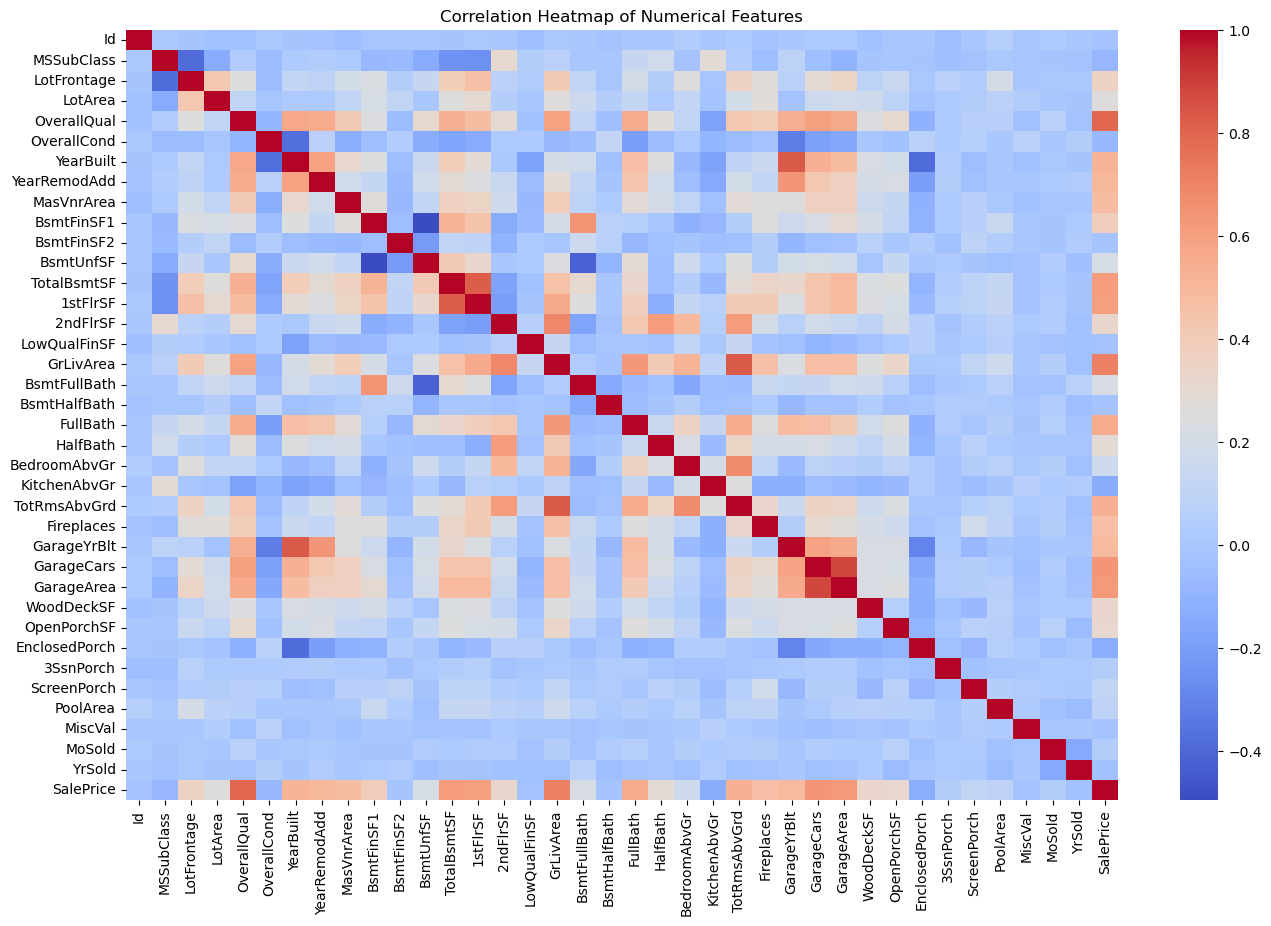

In [9]:
# Select only numerical columns for the correlation matrix
numerical_cols = train.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix on numerical columns
corr_matrix = train[numerical_cols].corr()

# Visualizing correlations using a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


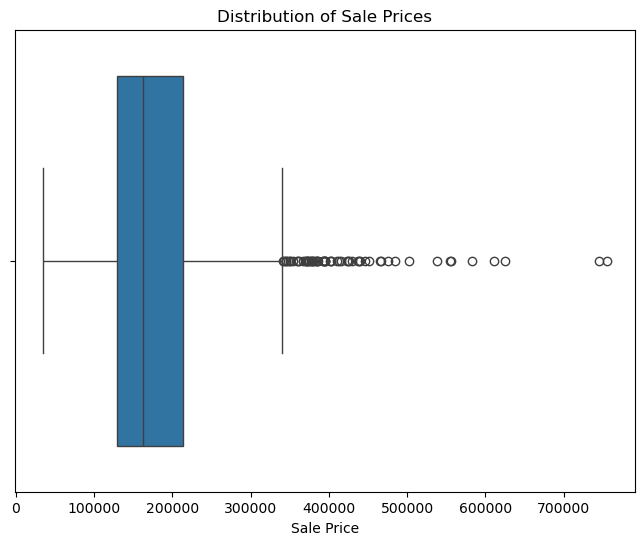

In [10]:
# boxplot to visualize the distribution of Sale Prices
plt.figure(figsize=(8, 6))
sns.boxplot(train['SalePrice'], orient='h')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.show()

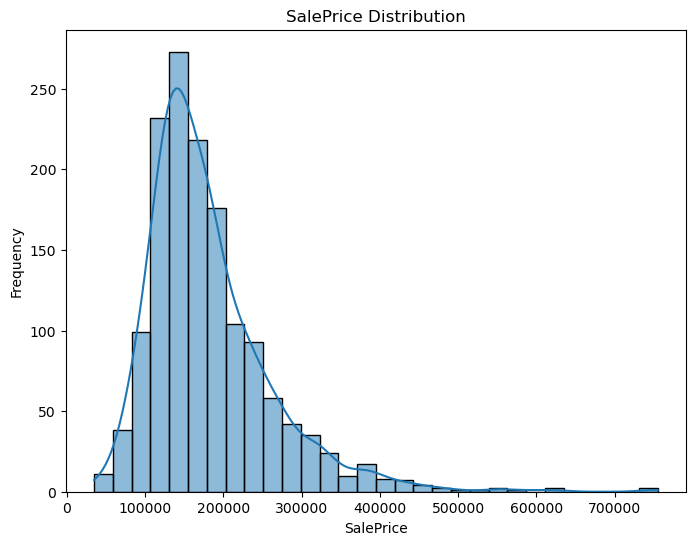

In [11]:
# Distribution of 'SalePrice'
plt.figure(figsize=(8, 6))
sns.histplot(train['SalePrice'], kde=True, bins=30)
plt.title('SalePrice Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

In [12]:
# SalePrice skewness and kurtosis
print(f"Skewness of SalePrice: {train['SalePrice'].skew()}")
print(f"Kurtosis of SalePrice: {train['SalePrice'].kurt()}")


Skewness of SalePrice: 1.8828757597682129
Kurtosis of SalePrice: 6.536281860064529


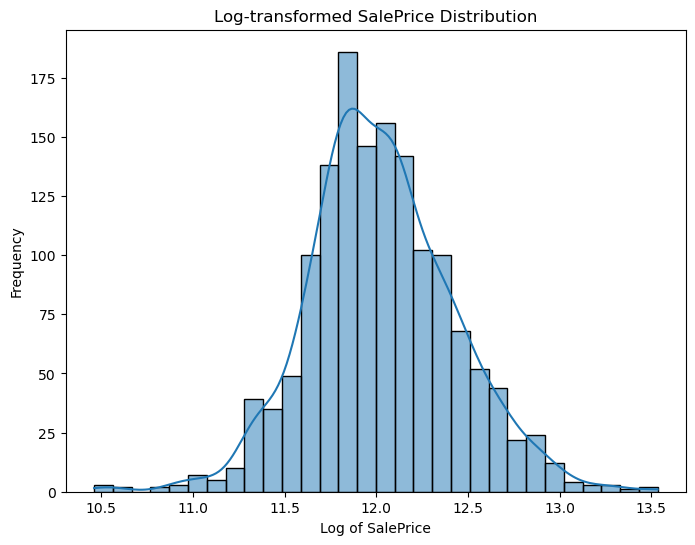

In [13]:
# Log transform of 'SalePrice' to normalize it
train['SalePrice'] = np.log(train['SalePrice'])

# Visualizing Log-transformed SalePrice
plt.figure(figsize=(8, 6))
sns.histplot(train['SalePrice'], kde=True, bins=30)
plt.title('Log-transformed SalePrice Distribution')
plt.xlabel('Log of SalePrice')
plt.ylabel('Frequency')
plt.show()


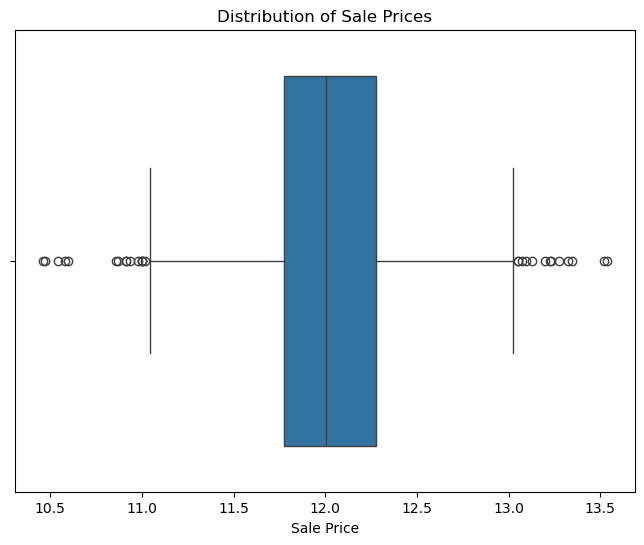

In [14]:
# boxplot to visualize the distribution of Sale Prices after log transform
plt.figure(figsize=(8, 6))
sns.boxplot(train['SalePrice'], orient='h')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.show()

### Handling Missing Data

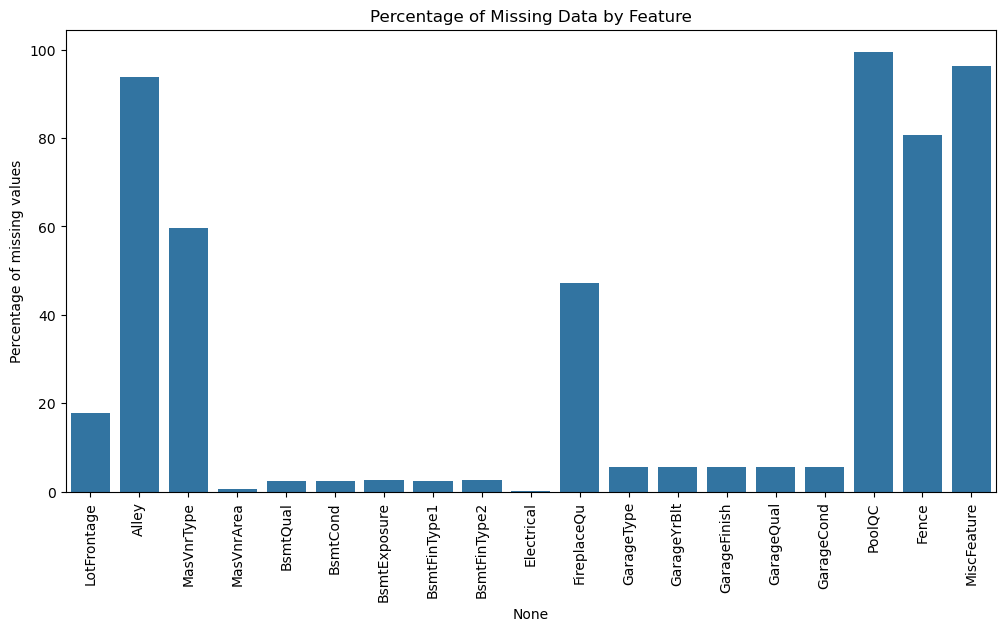

In [16]:
# Identify columns with missing values
missing_data = train.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]
missing_percentage = (train.isnull().sum() / len(train)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
plt.xticks(rotation=90)
plt.title('Percentage of Missing Data by Feature')
plt.ylabel('Percentage of missing values')
plt.show()



In [17]:
# Handle missing values (Here we just review for now)
print("Features with missing values in train dataset:")
print(missing_data)


Features with missing values in train dataset:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


### Numerical Features

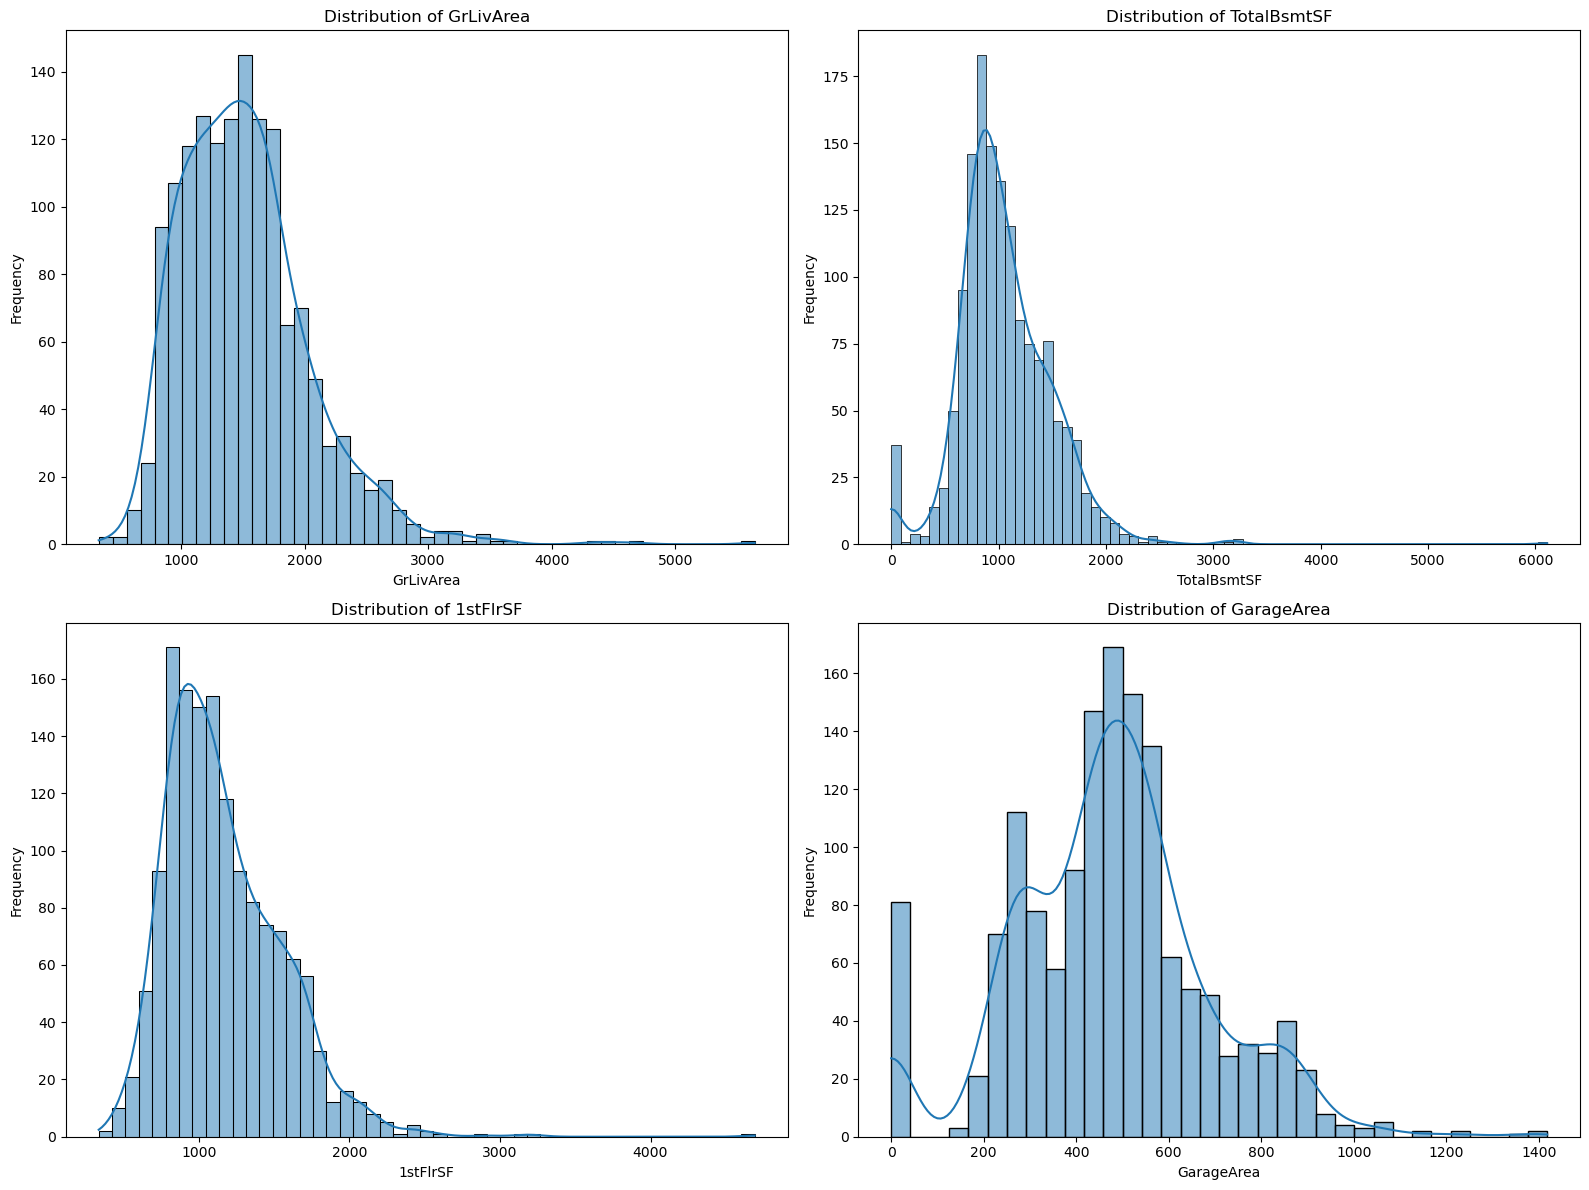

In [19]:
# Distribution of a few key numerical features
numeric_features = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(train[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


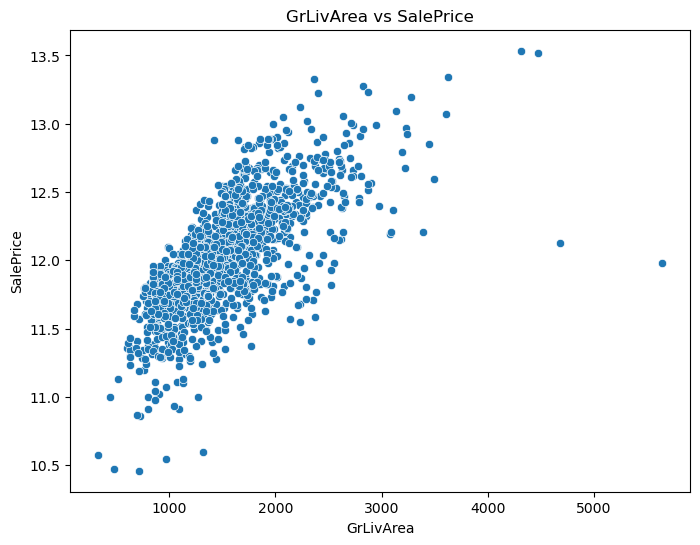

In [20]:
# Relationship between GrLivArea and SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()


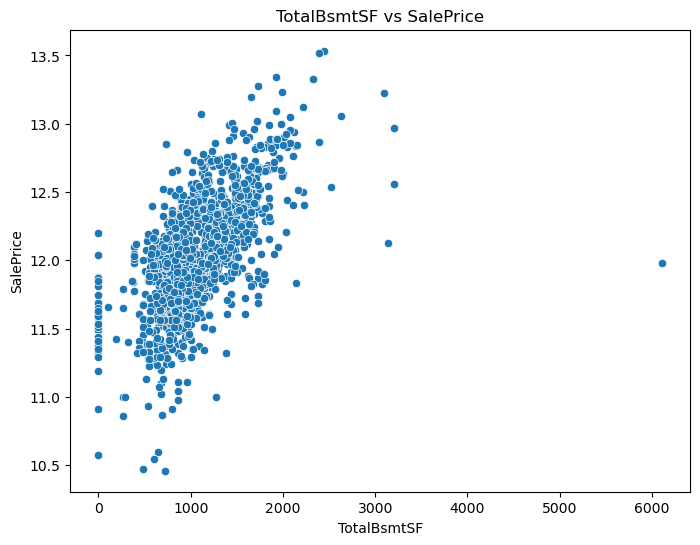

In [21]:
# Relationship between TotalBsmtSF and SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train['TotalBsmtSF'], y=train['SalePrice'])
plt.title('TotalBsmtSF vs SalePrice')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()


### Categorical Features

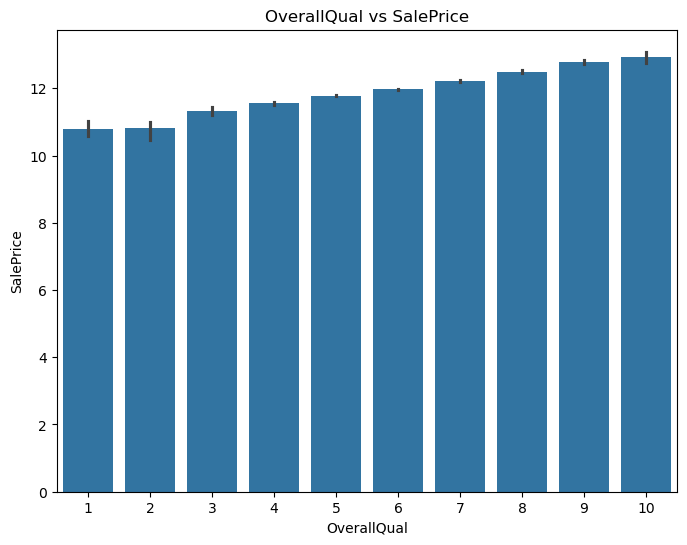

In [23]:
# Barplot for categorical features: OverallQual
plt.figure(figsize=(8, 6))
sns.barplot(x='OverallQual', y='SalePrice', data=train)
plt.title('OverallQual vs SalePrice')
plt.show()


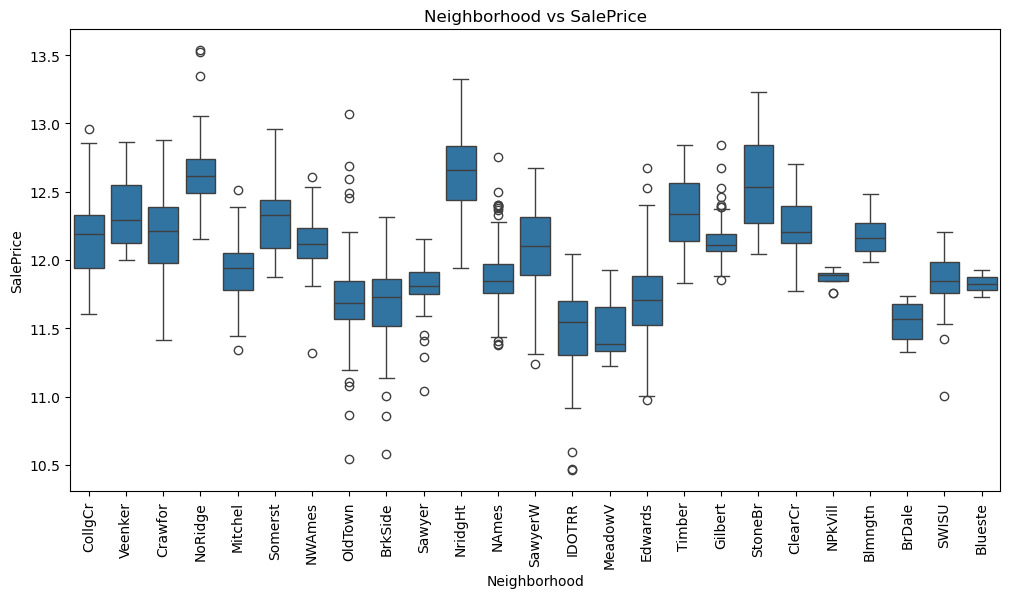

In [24]:
# Barplot for categorical feature: Neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train)
plt.xticks(rotation=90)
plt.title('Neighborhood vs SalePrice')
plt.show()


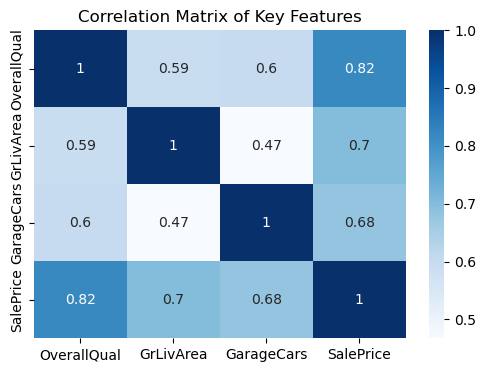

In [25]:
# Correlation of OverallQual, GrLivArea, and GarageCars with SalePrice
important_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'SalePrice']
corr_matrix = train[important_features].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.title('Correlation Matrix of Key Features')
plt.show()


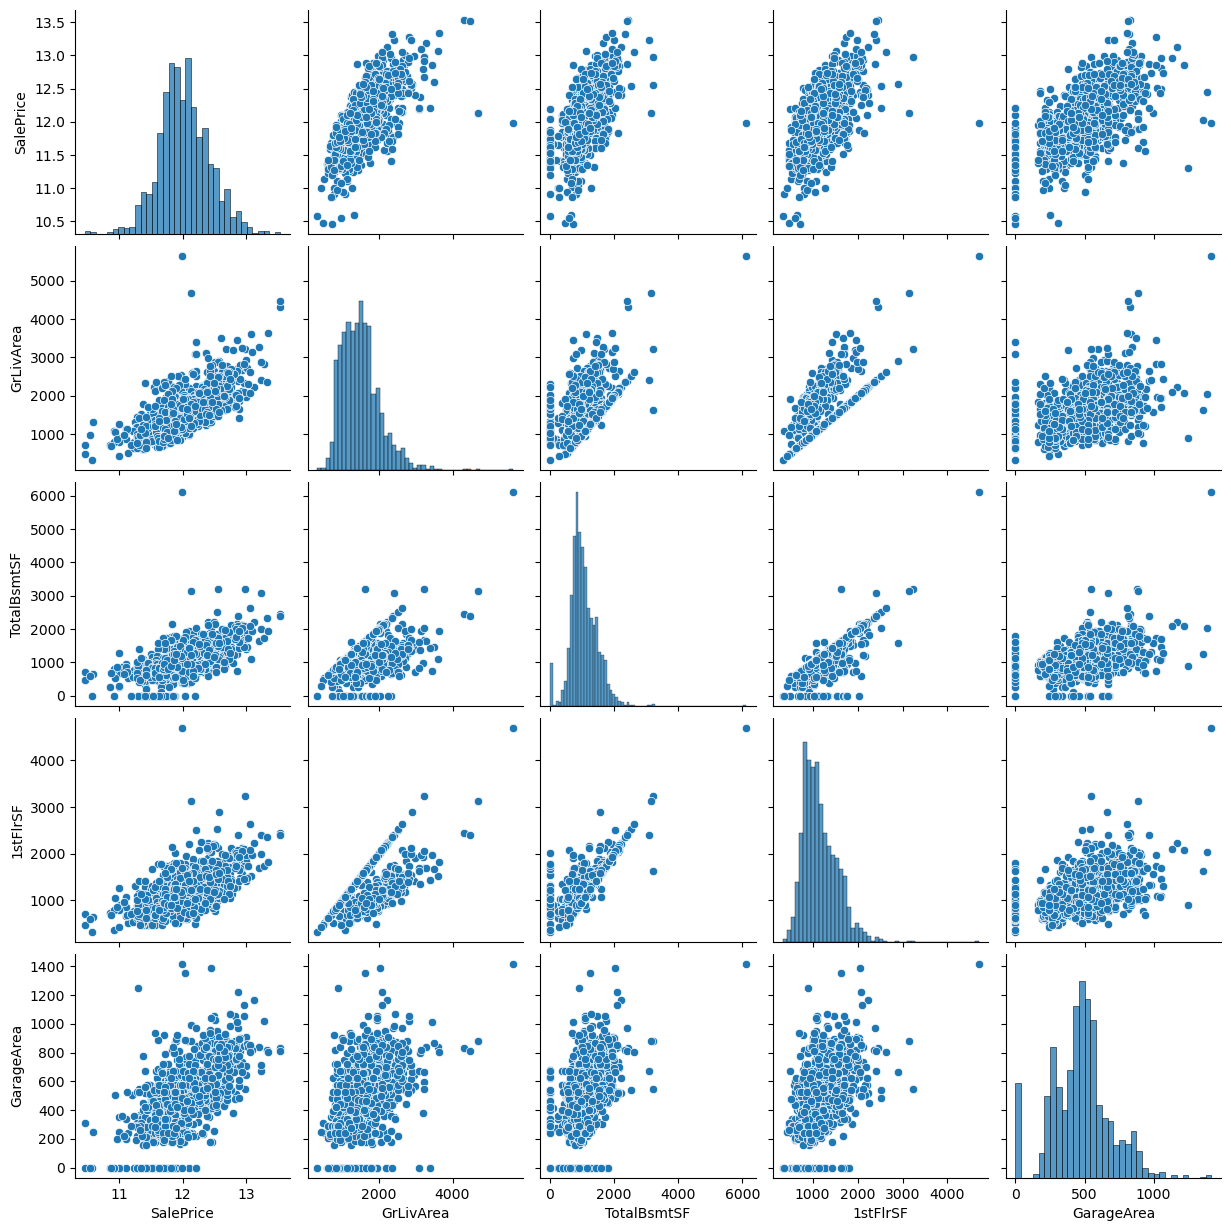

In [26]:
# Pairplot to see relationships between numerical features and SalePrice
sns.pairplot(train[['SalePrice', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']])
plt.show()


In [27]:
# Check missing data again to refresh
missing_data = train.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]
print(missing_data)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


### Data Preprocessing

In [29]:
# Fill missing values
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns
train[numeric_cols] = train[numeric_cols].fillna(train[numeric_cols].mean())

categorical_cols = train.select_dtypes(include=['object']).columns
train[categorical_cols] = train[categorical_cols].fillna(train[categorical_cols].mode().iloc[0])

print(train.isnull().sum().sum())


0


In [30]:
# Fill missing values
numeric_cols = test.select_dtypes(include=['float64', 'int64']).columns
test[numeric_cols] = test[numeric_cols].fillna(test[numeric_cols].mean())

categorical_cols = test.select_dtypes(include=['object']).columns
test[categorical_cols] = test[categorical_cols].fillna(test[categorical_cols].mode().iloc[0])

print(test.isnull().sum().sum())


0


In [31]:
# Identify skewed numerical features in train data
numeric_feats = train.dtypes[train.dtypes != "object"].index
numeric_feats = numeric_feats.drop('SalePrice')  # Exclude 'SalePrice'
skewness = train[numeric_feats].apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_features = skewness[skewness > 0.75]  # Consider features with skewness > 0.75

# Check skewnes features
print(skewed_features)

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.676412
LotFrontage       2.384950
OpenPorchSF       2.364342
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
dtype: float64


In [32]:
# Log transform the skewed features
skewed_features_log = skewed_features.index
train[skewed_features_log] = np.log1p(train[skewed_features_log])  # log1p to avoid log(0)
test[skewed_features_log] = np.log1p(test[skewed_features_log])

# Check to ensure skewness is reduced
print(train[skewed_features_log].skew())

MiscVal           5.170704
PoolArea         14.363102
LotArea          -0.137404
3SsnPorch         7.734975
LowQualFinSF      7.460317
KitchenAbvGr      3.869414
BsmtFinSF2        2.523694
ScreenPorch       3.150409
BsmtHalfBath      3.933064
EnclosedPorch     2.112275
MasVnrArea        0.481120
LotFrontage      -0.891977
OpenPorchSF      -0.023397
BsmtFinSF1       -0.618410
WoodDeckSF        0.153537
TotalBsmtSF      -5.154670
MSSubClass        0.248997
1stFlrSF          0.080114
GrLivArea        -0.006140
BsmtUnfSF        -2.186504
2ndFlrSF          0.289643
dtype: float64


## Feature Engineering

#### Transforming features

In [35]:
# Label Encoding for ordinal features like 'OverallQual', 'OverallCond', etc.
from sklearn.preprocessing import LabelEncoder

label_enc_features = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']
for feature in label_enc_features:
    le = LabelEncoder()
    train[feature] = le.fit_transform(train[feature])
    test[feature] = le.transform(test[feature])



In [36]:
# One-Hot Encoding for nominal categorical features
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# Ensure the train and test sets have the same dummy columns
train, test = train.align(test, join='left', axis=1, fill_value=0)

#### Creating new features

In [38]:
# # train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
# # test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

# # train['TotalBath'] = train['FullBath'] + (0.5 * train['HalfBath'])
# # test['TotalBath'] = test['FullBath'] + (0.5 * test['HalfBath'])

# for train
train["TotalSqrtFeet"] = train["GrLivArea"] + train["TotalBsmtSF"]
train["TotalBaths"] = train["BsmtFullBath"] + (train["BsmtHalfBath"] * .5) + train["FullBath"] + (train["HalfBath"] * .5)

#for test
test["TotalSqrtFeet"] = test["GrLivArea"] + test["TotalBsmtSF"]
test["TotalBaths"] = test["BsmtFullBath"] + (test["BsmtHalfBath"] * .5) + test["FullBath"] + (test["HalfBath"] * .5)

#### Feature availibility

In [40]:
# Check feature available or not
train['Isgarage'] = train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train['Isfireplace'] = train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
train['Ispool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train['Issecondfloor'] = train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train['IsOpenPorch'] = train['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
train['IsWoodDeck'] = train['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)


# Check feature available or not
test['Isgarage'] = test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
test['Isfireplace'] = test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
test['Ispool'] = test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
test['Issecondfloor'] = test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
test['IsOpenPorch'] = test['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
test['IsWoodDeck'] = test['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)


In [41]:
# # Select numerical features
# numerical_feats = train.select_dtypes(exclude=['object']).columns

# # Standardize numerical features
# scaler = StandardScaler()

# train[numerical_feats] = scaler.fit_transform(train[numerical_feats])
# test[numerical_feats] = scaler.transform(test[numerical_feats])


In [42]:
# Check the final shape of train and test data
print("Train dataset shape after feature engineering:", train.shape)
print("Test dataset shape after feature engineering:", test.shape)


Train dataset shape after feature engineering: (1460, 269)
Test dataset shape after feature engineering: (1459, 269)


#### Data Splitting

In [44]:
# split data into train and test
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Model Training

In [46]:
# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# Define a function to evaluate models using cross-validation
def evaluate_model(model, X, y):
    # Perform cross-validation with RMSE as the scoring metric
    cv_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    # Return the mean RMSE
    return np.sqrt(-cv_scores).mean()

# Dictionary to store model performance
model_performance = {}

# Evaluate each model and store the results
for model_name, model in models.items():
    rmse = evaluate_model(model, X_train, y_train)
    model_performance[model_name] = rmse
    print(f"{model_name} RMSE: {rmse:.4f}")

# Display all models' performance
print("\nModel Performance (Lower RMSE is Better):")


Linear Regression RMSE: 0.1377
Random Forest RMSE: 0.1438
Gradient Boosting RMSE: 0.1293
Decision Tree RMSE: 0.2244

Model Performance (Lower RMSE is Better):


In [47]:
for model_name, rmse in model_performance.items():
    print(f"{model_name}: {rmse:.4f}")

# Select the best model based on RMSE
best_model_name = min(model_performance, key=model_performance.get)
best_model = models[best_model_name]

print(f"\nBest model based on RMSE: {best_model_name} with RMSE: {model_performance[best_model_name]:.4f}")


Linear Regression: 0.1377
Random Forest: 0.1438
Gradient Boosting: 0.1293
Decision Tree: 0.2244

Best model based on RMSE: Gradient Boosting with RMSE: 0.1293


#### Model Selection

In [49]:
# Define the hyperparameter grid for the best model (if it's tunable)
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 15]
    }
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    }
else:
    param_grid = None  # For models without tuning or not needing it

# If param_grid exists, perform GridSearchCV to tune the hyperparameters
if param_grid:
    grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train) 
    # grid_search.fit(X, y)
    
    # Best parameters from the grid search
    print("Best parameters found:", grid_search.best_params_)


Best parameters found: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


#### Model Evaluation

In [51]:
# Get the best model
best_model = grid_search.best_estimator_

# Final model evaluation using the test set
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Calculate final RMSE on test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Final RMSE on Test Set for {best_model_name}: {rmse_test:.4f}")


Final RMSE on Test Set for Gradient Boosting: 0.1329


In [98]:
# Calculate R2 Score on test set
r2 = r2_score(y_test, y_pred)
print(f"R2 Score on Test Set for {best_model_name}: {r2:.4f}")


R2 Score on Test Set for Gradient Boosting: 0.9054


#### Sample predicted data and actual data

In [96]:
# Assuming y_test is a pandas Series
comparison_df = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(y_pred)})

# Display the first few rows
print(comparison_df.head())

        Actual      Predicted
892   154499.0  147124.848426
1105  324999.0  353826.445883
413   114999.0  112299.873857
522   158999.0  148345.580718
1036  315499.0  343755.533192


In [55]:
# Align test data with train data (to ensure the same number of features)
X_test = test.reindex(columns=X.columns, fill_value=0)

# Predict SalePrice for the test set using the best model
test['SalePrice'] = best_model.predict(X_test)

# Inverse log transformation to convert back to the original SalePrice scale
test['SalePrice'] = np.expm1(test['SalePrice'])

# Save the predictions to a CSV file
# test[['Id', 'SalePrice']].to_csv('house_price_predictions.csv', index=False)

# Print the first few predictions to verify
print(test[['Id', 'SalePrice']].head())


     Id      SalePrice
0  1461  122791.729088
1  1462  153808.702715
2  1463  181684.197615
3  1464  191923.351799
4  1465  177440.787069
